In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Datos
restmex23 = {
            'Tarea': ['Polarity', 'Country', 'Type'],
            'microTC_F1': [0.4890, 0.9119, 0.9766],
            'microTC_F1Acc': [0.3411, 0.8352, 0.9552],
            'FastText_F1': [0.3958, 0.7846, 0.8279],
            'FastText_F1Acc': [0.5274, 0.6744, 0.7382]
            }

restmex25 = {
            'Tarea': ['Polarity', 'Region', 'Town', 'Type'],
            'microTC_F1': [0.4785, 0.6218, 0.6072, 0.9664],
            'microTC_F1Acc': [0.3431, 0.4535, 0.4166, 0.9353],
            'FastText_F1': [0.4257, 0.4405, 0.2322, 0.8774],
            'FastText_F1Acc': [0.5650, 0.5283, 0.2972, 0.7777]
            }

df23 = pd.DataFrame(restmex23)
df25 = pd.DataFrame(restmex25)

## Resultados

In [3]:
from IPython.display import display

# imprimir datos
print("Resultados Rest-Mex 23")
display(df23.style.set_caption("Resultados Consolidados Rest-Mex 23"))

print("Resultados Rest-Mex 25")
display(df25.style.set_caption("Resultados Consolidados Rest-Mex 25"))

Resultados Rest-Mex 23


,Tarea,microTC_F1,microTC_F1Acc,FastText_F1,FastText_F1Acc
0,Polarity,0.489000,0.341100,0.395800,0.527400
1,Country,0.911900,0.835200,0.784600,0.674400
2,Type,0.976600,0.955200,0.827900,0.738200


Resultados Rest-Mex 25


,Tarea,microTC_F1,microTC_F1Acc,FastText_F1,FastText_F1Acc
0,Polarity,0.478500,0.343100,0.425700,0.565000
1,Region,0.621800,0.453500,0.440500,0.528300
2,Town,0.607200,0.416600,0.232200,0.297200
3,Type,0.966400,0.935300,0.877400,0.777700


/var/folders/c2/0hk0hmxd4zngvs6gpgdr_4qc0000gn/T/ipykernel_2336/2256738715.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df23_melt, x='Modelo', y='Puntaje', palette='pastel')


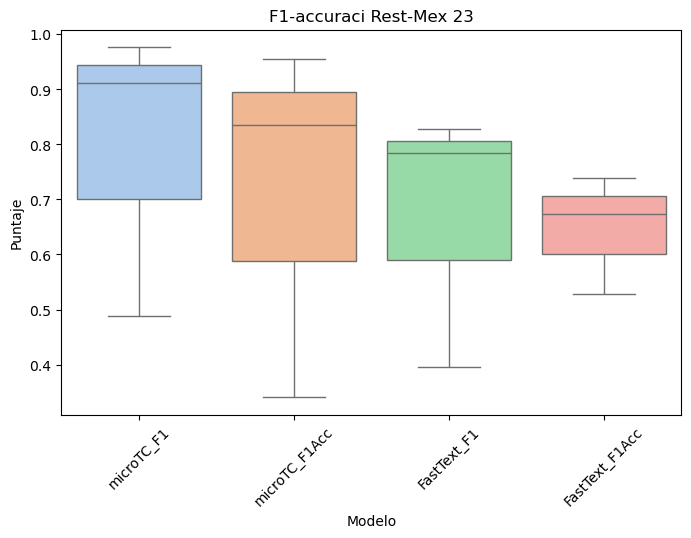

/var/folders/c2/0hk0hmxd4zngvs6gpgdr_4qc0000gn/T/ipykernel_2336/2256738715.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df25_melt, x='Modelo', y='Puntaje', palette='pastel')


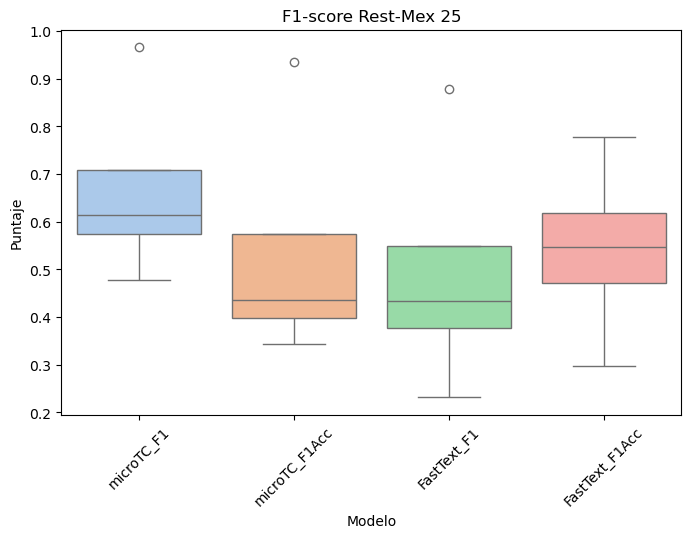

In [4]:
# preparar datos
df23_melt = df23.melt(id_vars='Tarea', var_name='Modelo', value_name='Puntaje')
df25_melt = df25.melt(id_vars='Tarea', var_name='Modelo', value_name='Puntaje')

# rest-mex 23
plt.figure(figsize=(8,5))
sns.boxplot(data=df23_melt, x='Modelo', y='Puntaje', palette='pastel')
plt.title('F1-accuraci Rest-Mex 23')
plt.xticks(rotation=45)
plt.show()

# rest-mex 25
plt.figure(figsize=(8,5))
sns.boxplot(data=df25_melt, x='Modelo', y='Puntaje', palette='pastel')
plt.title('F1-score Rest-Mex 25')
plt.xticks(rotation=45)
plt.show()

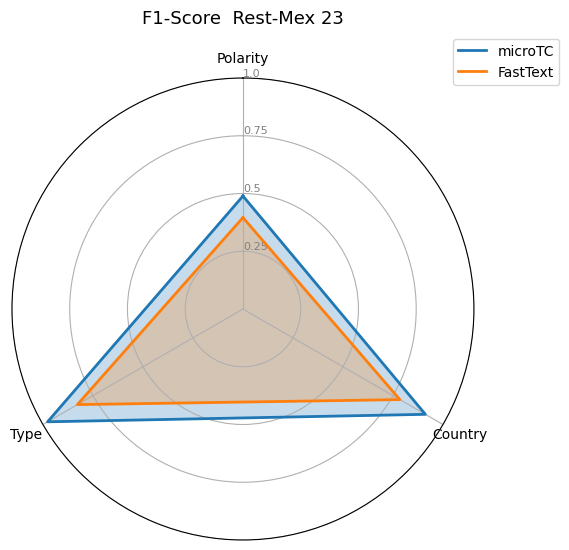

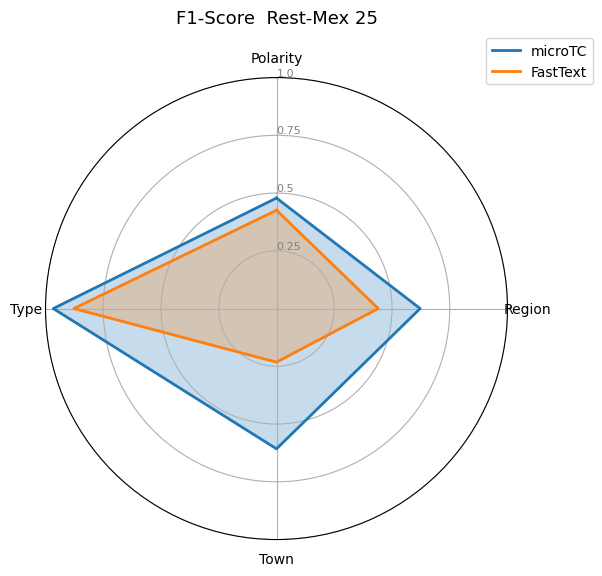

In [5]:
def plot_radar(df, titulo):
    categorias = df['Tarea']
    N = len(categorias)
    values_micro = df['microTC_F1'].tolist()
    values_fast = df['FastText_F1'].tolist()

    # cerrar el grafico conectando el ultimo punto con el primero
    values_micro += values_micro[:1]
    values_fast += values_fast[:1]

    # angulos
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    # grafico 
    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

    # ejes
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # microtc
    ax.plot(angles, values_micro, linewidth=2, linestyle='solid', label='microTC', color='#1f77b4')
    ax.fill(angles, values_micro, color='#1f77b4', alpha=0.25)

    # fasttext
    ax.plot(angles, values_fast, linewidth=2, linestyle='solid', label='FastText', color='#ff7f0e')
    ax.fill(angles, values_fast, color='#ff7f0e', alpha=0.25)

    plt.xticks(angles[:-1], categorias, fontsize=10)
    ax.set_rlabel_position(0)
    plt.yticks([0.25, 0.5, 0.75, 1.0], ["0.25","0.5","0.75","1.0"], color="gray", size=8)
    plt.ylim(0, 1)

    plt.title(titulo, size=13, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.show()

plot_radar(df23, "F1-Score  Rest-Mex 23")
plot_radar(df25, "F1-Score  Rest-Mex 25")


In [6]:
from scipy.stats import ttest_rel

# datos por metrica
f1_microtc = np.array([0.4890, 0.9119, 0.9766, 0.4785, 0.6218, 0.6072, 0.9664])
acc_microtc = np.array([0.3411, 0.8352, 0.9552, 0.3431, 0.4535, 0.4166, 0.9353])

f1_fasttext = np.array([0.3958, 0.7846, 0.8279, 0.4257, 0.4405, 0.2322, 0.8774])
acc_fasttext = np.array([0.5274, 0.6744, 0.7382, 0.5650, 0.5283, 0.2972, 0.7777])

#  prueba t pareada (comparando modelo a modelo por tarea) 
t_f1, p_f1 = ttest_rel(f1_microtc, f1_fasttext)
t_acc, p_acc = ttest_rel(acc_microtc, acc_fasttext)

print("Comparación F1-Score: t = %.3f, p = %.4f" % (t_f1, p_f1))
print("Comparación F1-Accuracy: t = %.3f, p = %.4f" % (t_acc, p_acc))

alpha = 0.05
if p_f1 < alpha:
    print("Diferencia significativa en F1-Score (p < 0.05)")
else:
    print("No hay diferencia significativa en F1-Score (p >= 0.05)")

if p_acc < alpha:
    print("Diferencia significativa en F1-Accuracy (p < 0.05)")
else:
    print("No hay diferencia significativa en F1-Accuracy (p >= 0.05)")


Comparación F1-Score: t = 3.776, p = 0.0092
Comparación F1-Accuracy: t = 0.358, p = 0.7326
Diferencia significativa en F1-Score (p < 0.05)
No hay diferencia significativa en F1-Accuracy (p >= 0.05)


In [11]:
import numpy as np
from scipy.stats import wilcoxon


f1_microtc = np.array([0.4890, 0.9119, 0.9766, 0.4785, 0.6218, 0.6072, 0.9664])
f1_fasttext = np.array([0.3958, 0.7846, 0.8279, 0.4257, 0.4405, 0.2322, 0.8774])

acc_microtc = np.array([0.3411, 0.8352, 0.9552, 0.3431, 0.4535, 0.4166, 0.9353])
acc_fasttext = np.array([0.5274, 0.6744, 0.7382, 0.5650, 0.5283, 0.2972, 0.7777])

stat, p_value = wilcoxon(f1_microtc, f1_fasttext)

print("Prueba de Wilcoxon f1")
print(f"Estadístico W: {stat:.4f}")
print(f"p-value: {p_value:.6f}")

alpha = 0.05
if p_value < alpha:
    print("Hay diferencia estadísticamente significativa entre los modelos (p < 0.05)")
else:
    print("No hay diferencia estadísticamente significativa entre los modelos (p ≥ 0.05)")


stat, p_value = wilcoxon(acc_microtc, acc_fasttext)

print("Prueba Wilcoxon acc")
print(f"Estadístico W: {stat:.4f}")
print(f"p-value: {p_value:.6f}")

alpha = 0.05
if p_value < alpha:
    print("Hay diferencia estadísticamente significativa entre los modelos (p < 0.05)")
else:
    print("No hay diferencia estadísticamente significativa entre los modelos (p ≥ 0.05)")


Prueba de Wilcoxon f1
Estadístico W: 0.0000
p-value: 0.015625
Hay diferencia estadísticamente significativa entre los modelos (p < 0.05)
Prueba Wilcoxon acc
Estadístico W: 13.0000
p-value: 0.937500
No hay diferencia estadísticamente significativa entre los modelos (p ≥ 0.05)


## Desvalanceo de clases en Polarity Rest-Mex25

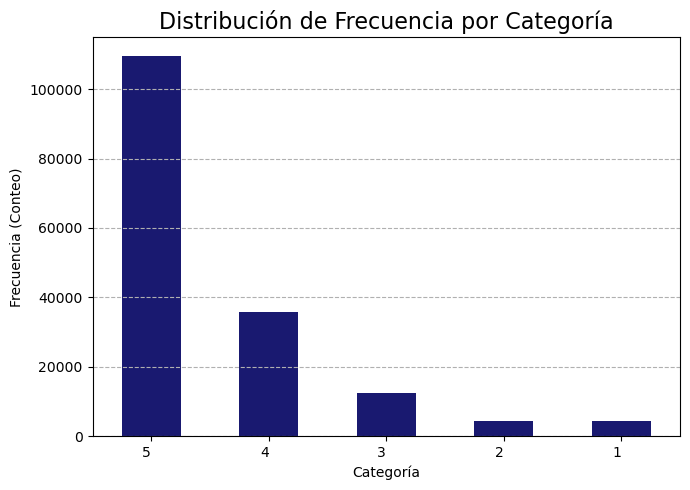

In [8]:
df = pd.read_json("Rest-Mex25_Pol_train.json", lines = True)

contclases = df['klass'].value_counts()

plt.figure(figsize=(7, 5)) 
contclases.plot(kind='bar', color='midnightblue')

plt.title('Distribución de Frecuencia por Categoría', fontsize=16)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia (Conteo)')
plt.xticks(rotation=0, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()